Logistic regression


In [ ]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn


Заменил ссылку на файл на свою. Ссылка ведет на bank-full.csv, размещенный на моем Google Drive

In [ ]:
#df=pd.read_csv("D:\\bank-full.csv",encoding="cp1251",sep=";")
df=pd.read_csv("https://drive.google.com/uc?export=download&id=1rHEGbD9qBr6xISelXwwhQu_YSyYfkQgH",encoding="cp1251",sep=";") 

In [ ]:
df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no


In [ ]:
df=df.dropna()
df.shape

(45211, 17)

In [ ]:
df.apply(lambda x: sum(x=='unknown'),axis=0)

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [ ]:
df=df.drop(['contact','poutcome'],axis=1)


In [ ]:
df=df[(df['job']!='unknown')&(df['education']!='unknown')]

In [ ]:
df.apply(lambda x: sum(x=='unknown'),axis=0)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [ ]:
df.head(50)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,5,may,380,1,-1,0,no
8,58,retired,married,primary,no,121,yes,no,5,may,50,1,-1,0,no
9,43,technician,single,secondary,no,593,yes,no,5,may,55,1,-1,0,no
10,41,admin.,divorced,secondary,no,270,yes,no,5,may,222,1,-1,0,no
11,29,admin.,single,secondary,no,390,yes,no,5,may,137,1,-1,0,no


In [ ]:
df.shape

(43193, 15)

In [ ]:
df['education']=df['education'].map({'primary':0,'secondary':1,'tertiary':3})
df['default']=df['default'].map({'no':0, 'yes':1})
df['housing']=df['housing'].map({'no':0,'yes':1})
df['loan']=df['loan'].map({'no':0,'yes':1})
df['y']=df['y'].map({'no':0,'yes':1})
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,3,0,2143,1,0,5,may,261,1,-1,0,0
1,44,technician,single,1,0,29,1,0,5,may,151,1,-1,0,0
2,33,entrepreneur,married,1,0,2,1,1,5,may,76,1,-1,0,0
5,35,management,married,3,0,231,1,0,5,may,139,1,-1,0,0
6,28,management,single,3,0,447,1,1,5,may,217,1,-1,0,0


In [ ]:
features=['job','marital','month']
df=pd.get_dummies(df,columns=features)


In [ ]:
df.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44,1,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,1,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,35,3,0,231,1,0,5,139,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6,28,3,0,447,1,1,5,217,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
x=df.drop('y',axis=1)
y=df['y']
from sklearn import preprocessing
# normalize the data attributes
x = preprocessing.normalize(x)
# standardize the data attributes
x = preprocessing.scale(x)
x

array([[-0.60839212, -0.35837691, -0.09892884, ..., -0.17130466,
        -0.0680749 , -0.05641563],
       [ 1.42209746,  0.42737287, -0.09892884, ..., -0.17130466,
        -0.0680749 , -0.05641563],
       [ 2.42281118,  1.3632364 , -0.09892884, ..., -0.17130466,
        -0.0680749 , -0.05641563],
       ...,
       [-0.72709442, -0.55524224, -0.09892884, ..., -0.00446168,
        -0.0680749 , -0.05641563],
       [-0.27370501, -0.39080289, -0.09892884, ...,  0.98451644,
        -0.0680749 , -0.05641563],
       [-0.72722515, -0.52907026, -0.09892884, ...,  0.15294296,
        -0.0680749 , -0.05641563]])

In [ ]:
df.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44,1,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,1,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,35,3,0,231,1,0,5,139,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6,28,3,0,447,1,1,5,217,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
x.shape

(43193, 37)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(
#Метод для поиска решения, для небольших наборов 
#подходит Newton-cg, sag,saga
solver='liblinear',
#Норма для регуляризации сумма квадратов
penalty='l2',
#Если распознается 2 класса
multi_class='ovr')


In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

log_reg.score(X_test, y_test)


0.8880228430313319

In [ ]:
log_reg.predict_proba(X_test)

array([[0.50199413, 0.49800587],
       [0.99864279, 0.00135721],
       [0.99811576, 0.00188424],
       ...,
       [0.93024759, 0.06975241],
       [0.93261007, 0.06738993],
       [0.91956056, 0.08043944]])

In [ ]:
log_reg.coef_

array([[-0.08349153,  0.65087792,  0.0122239 ,  0.58411353, -1.22139026,
        -0.44556138,  0.01590315,  1.61506474, -2.00680869,  0.40136271,
         0.09580667, -0.32816752, -0.87222128, -0.39791244, -0.25379888,
        -0.64228144, -0.07194895, -0.20268392, -0.48151908, -0.00643903,
        -0.58331496, -0.19526837, -0.44044528, -1.27928403, -0.71795079,
         0.07117662, -0.46377941,  0.08344463, -0.12154001, -0.3581624 ,
        -0.73242808, -0.34512662,  0.21461563, -1.27673937, -0.32441745,
         0.15400492,  0.14013832]])

In [ ]:
pred=log_reg.predict(x)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pred_prob=log_reg.predict_proba(x)
pred_prob

array([[8.94861148e-01, 1.05138852e-01],
       [9.99956531e-01, 4.34688856e-05],
       [1.00000000e+00, 6.39390826e-13],
       ...,
       [7.52492495e-01, 2.47507505e-01],
       [7.53382049e-01, 2.46617951e-01],
       [8.26565920e-01, 1.73434080e-01]])

In [ ]:
from sklearn.metrics import roc_curve, auc

pred2=pred_prob[:,1]
fpr,tpr,threshold=roc_curve(y,pred2)
roc_auc=auc(fpr,tpr)
pred2

array([1.05138852e-01, 4.34688856e-05, 6.39390826e-13, ...,
       2.47507505e-01, 2.46617951e-01, 1.73434080e-01])

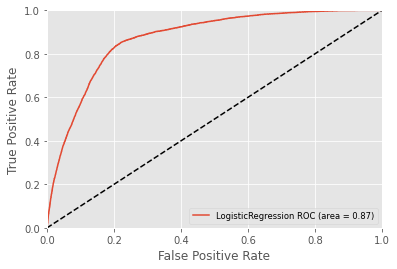

In [ ]:

pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='small')
pl.show()

In [ ]:
from sklearn import metrics
conf_mat=metrics.confusion_matrix(y,pred)
conf_mat=pd.DataFrame(conf_mat,index=log_reg.classes_)
conf_mat

,0,1
0,37408,764
1,3952,1069


Вопрос: почему?  попробовать изменить порог, регуляризация

## Решение

Больше метрик для лучшего понимания:

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print('Accuracy:')
print(accuracy_score(y,pred))
print('Recall:')
print(recall_score(y,pred))
print('Precision:')
print(precision_score(y,pred))

Accuracy:
0.8908156414233788
Recall:
0.21290579565823542
Precision:
0.5831969448990726


В данной задаче recall, скорее всего, важнее precision, так как обычно лучше позвонить излишнее количество раз, чем потерять потенциальных клиентов.

Функция, которую будем использовать для отображения метрик

В confusion matrix в sklearn строки - классы, столбцы - предсказания

In [ ]:
from sklearn.metrics import roc_auc_score

def run_with_metrics(threshold = 0.5):
    log_reg.fit(X_train, y_train)

    pred_prob=log_reg.predict_proba(x)

    pred=(pred_prob[:,1] >= threshold).astype(bool)

    pred2=pred_prob[:,1]
    fpr,tpr,threshold=roc_curve(y,pred2)
    roc_auc=auc(fpr,tpr)

    pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))
    pl.plot([0, 1], [0, 1], 'k--')
    pl.xlim([0.0, 1.0])
    pl.ylim([0.0, 1.0])
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.legend(loc=0, fontsize='small')
    pl.show()

    print("AUC ROC:")
    print(roc_auc_score(y, pred))

    print("Confusion matrix:")
    conf_mat=metrics.confusion_matrix(y,pred)
    conf_mat=pd.DataFrame(conf_mat,index=log_reg.classes_)
    print(conf_mat)
    print()

    print('Accuracy:')
    print(accuracy_score(y,pred))
    print('Recall:')
    print(recall_score(y,pred))
    print('Precision:')
    print(precision_score(y,pred))

In [ ]:
log_reg = LogisticRegression(
#Метод для поиска решения, для небольших наборов 
#подходит Newton-cg, sag,saga
solver='liblinear',
#Норма для регуляризации сумма квадратов
penalty='l2',
#Если распознается 2 класса
multi_class='ovr',
#artemgur
#Sklearn автоматически определит веса классов по количеству элементов в них. Нужно, так как классы очень несбалансированны (что можно увидеть, например, из confusion matrix)
class_weight='balanced')

class_weight='balanced' существенно улучшает результат. Accuracy несколько понижается, но precision и recall существенно повышаются

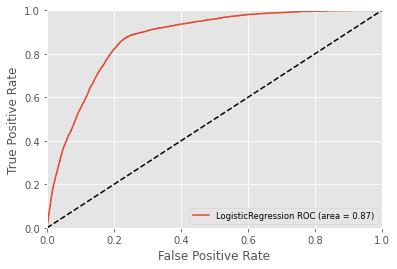

AUC ROC:
0.8160654518548034
Confusion matrix:
       0     1
0  29976  8196
1    769  4252

Accuracy:
0.7924432199661983
Recall:
0.8468432583150767
Precision:
0.3415809768637532


In [ ]:
run_with_metrics()

Подбор параметра регуляризации L2:

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.arange(1, 100, 1)}
logistic_regression = LogisticRegression(
#Метод для поиска решения, для небольших наборов 
#подходит Newton-cg, sag,saga
solver='liblinear',
#Норма для регуляризации сумма квадратов
penalty='l2',
#Если распознается 2 класса
multi_class='ovr',
#artemgur
#Sklearn автоматически определит веса классов по количеству элементов в них. Нужно, так как классы очень несбалансированны (что можно увидеть, например, из confusion matrix)
class_weight='balanced')

grid = GridSearchCV(estimator=logistic_regression, param_grid=parameters, scoring='roc_auc_ovr')
grid.fit(x, y)
best_params = grid.best_params_
best_C = best_params['C']
best_C

85

In [ ]:
log_reg = LogisticRegression(
#Метод для поиска решения, для небольших наборов 
#подходит Newton-cg, sag,saga
solver='liblinear',
#Норма для регуляризации сумма квадратов
penalty='l2',
#Если распознается 2 класса
multi_class='ovr',
#artemgur
#Sklearn автоматически определит веса классов по количеству элементов в них. Нужно, так как классы очень несбалансированны (что можно увидеть, например, из confusion matrix)
class_weight='balanced',
C=best_C)

Подбор парамерта регуляризации почти не повлиял на результат

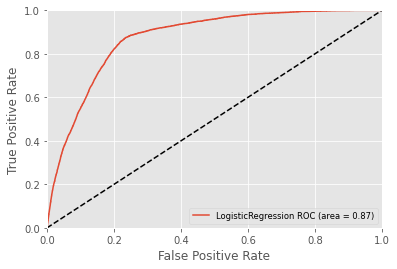

AUC ROC:
0.8158924855541756
Confusion matrix:
       0     1
0  29978  8194
1    771  4250

Accuracy:
0.7924432199661983
Recall:
0.8464449312885879
Precision:
0.34153005464480873


In [ ]:
run_with_metrics()

Попробуем заменить регуляризацию на L1

In [ ]:
log_reg = LogisticRegression(
#Метод для поиска решения, для небольших наборов 
#подходит Newton-cg, sag,saga
solver='liblinear',
#Норма для регуляризации сумма квадратов
penalty='l1',
#Если распознается 2 класса
multi_class='ovr',
#artemgur
#Sklearn автоматически определит веса классов по количеству элементов в них. Нужно, так как классы очень несбалансированны (что можно увидеть, например, из confusion matrix)
class_weight='balanced')

L1 незначительно отличается от L2 по результатам. При этом L2, похоже, работает быстрее.

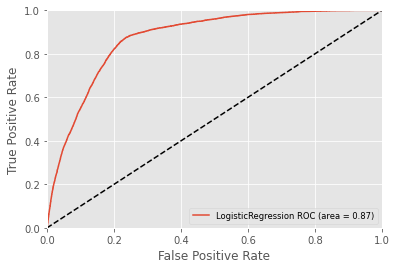

AUC ROC:
0.8161519350051173
Confusion matrix:
       0     1
0  29975  8197
1    768  4253

Accuracy:
0.7924432199661983
Recall:
0.847042421828321
Precision:
0.34160642570281124


In [ ]:
run_with_metrics()

Подбор параметра регуляризации L1:

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.arange(1, 100, 1)}
logistic_regression = LogisticRegression(
#Метод для поиска решения, для небольших наборов 
#подходит Newton-cg, sag,saga
solver='liblinear',
#Норма для регуляризации сумма квадратов
penalty='l1',
#Если распознается 2 класса
multi_class='ovr',
#artemgur
#Sklearn автоматически определит веса классов по количеству элементов в них. Нужно, так как классы очень несбалансированны (что можно увидеть, например, из confusion matrix)
class_weight='balanced')

grid = GridSearchCV(estimator=logistic_regression, param_grid=parameters, scoring='roc_auc_ovr')
grid.fit(x, y)
best_params = grid.best_params_
best_C = best_params['C']
best_C

84

In [ ]:
log_reg = LogisticRegression(
#Метод для поиска решения, для небольших наборов 
#подходит Newton-cg, sag,saga
solver='liblinear',
#Норма для регуляризации сумма квадратов
penalty='l1',
#Если распознается 2 класса
multi_class='ovr',
#artemgur
#Sklearn автоматически определит веса классов по количеству элементов в них. Нужно, так как классы очень несбалансированны (что можно увидеть, например, из confusion matrix)
class_weight='balanced',
C=best_C)

Подбор оптимального параметра регуляризации L1 практически не улучшил результат

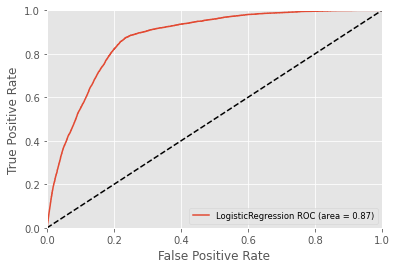

AUC ROC:
0.8158793869478673
Confusion matrix:
       0     1
0  29977  8195
1    771  4250

Accuracy:
0.7924200680665848
Recall:
0.8464449312885879
Precision:
0.34150261149055844


In [ ]:
run_with_metrics()

Найдем оптимальный порог для L2 с подобранным параметром регуляризации (результаты L1 и L2 практически не отличаются, зато L2 работает быстрее) 

In [ ]:
log_reg = LogisticRegression(
#Метод для поиска решения, для небольших наборов 
#подходит Newton-cg, sag,saga
solver='liblinear',
#Норма для регуляризации сумма квадратов
penalty='l2',
#Если распознается 2 класса
multi_class='ovr',
#artemgur
#Sklearn автоматически определит веса классов по количеству элементов в них. Нужно, так как классы очень несбалансированны (что можно увидеть, например, из confusion matrix)
class_weight='balanced',
C=85)

log_reg.fit(X_train, y_train)

pred_prob=log_reg.predict_proba(x)

max_score = -1
best_threshold = -1

for threshold in np.arange(0.3, 0.7, 0.01):
    pred=(pred_prob[:,1] >= threshold).astype(bool)
    score = roc_auc_score(y, pred)
    if (score > max_score):
        max_score = score
        best_threshold = threshold

best_threshold

0.49000000000000016

Изменение порога немного улучшило результат:

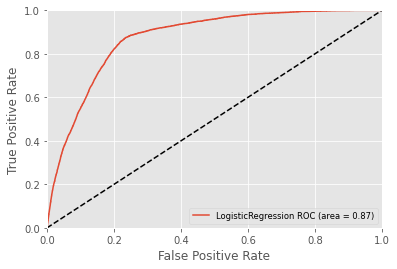

AUC ROC:
0.8192388729361204
Confusion matrix:
       0     1
0  29382  8790
1    659  4362

Accuracy:
0.7812377005533304
Recall:
0.8687512447719578
Precision:
0.33166058394160586


In [ ]:
run_with_metrics(best_threshold)